In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [11]:
## Hyperparameters
epochs = 100  
batch_size = 64
img_dims = (96,96,3) # RGB 3 color channels
lr = 1e-3

In [12]:
## intializing data(list) for imgage and labels for their gender classification
X = []
Y = []

In [13]:
## storing the image file directories in the image_files array
image_files = [f for f in glob.glob(r'C:\Users\SUDESHNA BOSE\Desktop\Gender-Detection-master\gender_dataset_face'+ "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [14]:
## storing the the value of pixels of images (3d array) in list as X
## and classification also as Y(also list not np array)
for img in image_files:

    image = cv2.imread(img)
    image = cv2.resize(image, (img_dims[0],img_dims[1]))  #resizing the images for uniformity in dataset
    image = img_to_array(image)
    X.append(image)

    label = img.split(os.path.sep)[-2] #spliting the file directories and using the second last file_name as label
    if label == "woman":
        label = 1
    else:
        label = 0
        
    Y.append([label]) # [[1], [0], [0], ...]

In [15]:
## converting list into array so that it can help in
## further model tuning
Y = np.array(Y)
X = np.array(X, dtype="float") / 255.0

In [16]:
## spliting the data into train and test dataset(75-25)
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=2)

In [17]:
Y_train = to_categorical(Y_train, num_classes=2) #  to make categories for both gender
Y_test = to_categorical(Y_test, num_classes=2)  #[[1, 0], [0, 1], [0, 1], ...]

In [18]:
## making the CNN architecture 
## using the activation function of relu
## 
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

In [19]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2], classes=2)


In [20]:
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

C:\Annaconda\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [22]:
H = model.fit_generator(aug.flow(X_train, Y_train, batch_size=batch_size),
                        validation_data=(X_test,Y_test),
                        steps_per_epoch=len(X_train) // batch_size,
                        epochs=epochs, verbose=1)

C:\Annaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
28/28 [==============================] - 32s 1s/step - loss: 0.7790 - accuracy: 0.7288 - val_loss: 0.6830 - val_accuracy: 0.5325
Epoch 2/100
28/28 [==============================] - 28s 1s/step - loss: 0.4915 - accuracy: 0.8119 - val_loss: 0.6736 - val_accuracy: 0.6753
Epoch 3/100
28/28 [==============================] - 27s 977ms/step - loss: 0.3965 - accuracy: 0.8417 - val_loss: 0.6972 - val_accuracy: 0.6407
Epoch 4/100
28/28 [==============================] - 27s 951ms/step - loss: 0.3900 - accuracy: 0.8467 - val_loss: 0.7498 - val_accuracy: 0.5346
Epoch 5/100
28/28 [==============================] - 26s 918ms/step - loss: 0.3489 - accuracy: 0.8540 - val_loss: 2.1999 - val_accuracy: 0.5346
Epoch 6/100
28/28 [==============================] - 26s 915ms/step - loss: 0.3348 - accuracy: 0.8630 - val_loss: 1.0291 - val_accuracy: 0.5390
Epoch 7/100
28/28 [==============================] - 24s 858ms/step - loss: 0.2914 - accuracy: 0.8838 - val_loss: 1.6076 - val_accuracy: 0.534

In [59]:
model.save('gender_detection.model')

INFO:tensorflow:Assets written to: gender_detection.model\assets


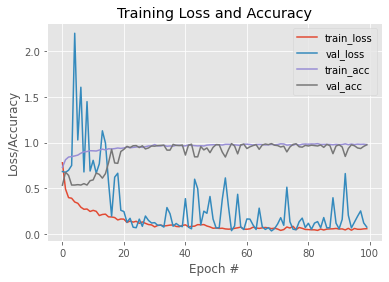

In [24]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')